In [ ]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.primitives import Sampler as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import Aer
from qiskit import BasicAer, execute
from qiskit.circuit.random import random_circuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
service = QiskitRuntimeService(channel="ibm_quantum")

# Q1. Quantum Teleportation

This notebook is part of your programming assignment. The first question is to implement quantum teleportation. For your guidance, this is the circuit diagram. The teleportation algorithm can be used to teleport an unknown quantum state.

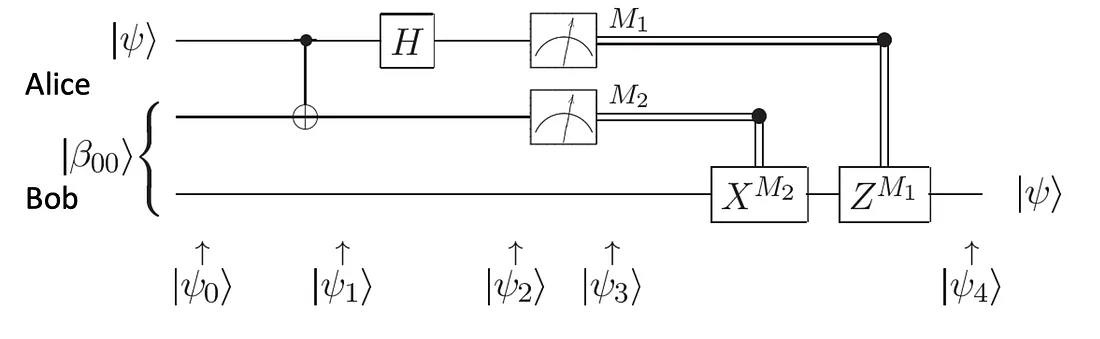

To generate an unknown quantum state $\vert \psi \rangle$, we act on the $\vert 0 \rangle$ state with a random unitary $U_{\text{rand}}$ using a qiskit inbuilt function. As such, $$\vert \psi \rangle = U_{\text{rand}} \vert 0 \rangle.$$

In [ ]:
#In this notebook, we create a quantum circuit using named quantum registers. These will help label the different qubits and cbits.
alice_reg = QuantumRegister(2, name="alice")
bob_reg = QuantumRegister(1, name="bob")
qc = QuantumCircuit(alice_reg, bob_reg)
qc.draw()

## Q1a. Create the state $\vert \psi_0 \rangle$ as depicted in the diagram above.

To create the unknown state $\vert \psi \rangle$, append a random circuit to the first qubit. A random circuit can be created using the random_circuit function from qiskit. Next, create the state $\vert \beta_{00} \rangle$, which is a Bell state $\vert \Phi^+ \rangle$.

In [ ]:
u_psi = random_circuit(1, 1)

In [ ]:
### Make changes only between the lines below. In this cell block, create $\vert \psi \rangle$ using u_psi and create the Bell state on Alice_1 and Bob qubits.
### Note that running the cell multiple times will lead to adding multiple gates, which will lead to an error. You can rerun all the cells from the beginning to create a new circuit.

# -------------------------------------------------------

# -------------------------------------------------------

qc.barrier()
qc.draw()

## Q1b. Create the state $\vert \psi_3 \rangle$ as depicted in the diagram above.

Next, we need to perform the Bell measurement. To do this, we first need to add classical registers to the circuit.

In [ ]:
alice_reg_1 = ClassicalRegister(1)
qc.add_register(alice_reg_1)
alice_reg_2 = ClassicalRegister(1)
qc.add_register(alice_reg_2)
qc.draw()

In [ ]:
### Make changes only between the line below. Add circuit elements to realize a Bell measurement. Measure Alice_0 into alice_bell_class_reg and Alice_1 into 

# -------------------------------------------------------

# -------------------------------------------------------

qc.barrier()
qc.draw()

## Q1c. Create the state $\vert \psi_4 \rangle$ as depicted in the diagram above.

Next, we perform the correction based on the classical data. This can be done with the c_if instruction. The syntax is as follows:

circuit.gate(qubit_to_add_gate_on).c_if(classical_register, value)

In [ ]:
### Make changes only between the lines below. Based on the classical data measured, apply a correction to Bob's qubit.

# -------------------------------------------------------

# -------------------------------------------------------

qc.barrier()
qc.draw()

## Q1d. Test if Bob's final state is the input state

To check if Bob's qubit is the same as the input state $\vert \psi \rangle$, we apply $U^\dagger$ and check if the qubit is zero. Use circuit.inverse() to get the adjoint of the circuit.

In [ ]:
final_classical_reg = ClassicalRegister(1)
qc.add_register(final_classical_reg)

In [ ]:
### Make changes only between the lines below. 

# -------------------------------------------------------

# -------------------------------------------------------

qc.barrier()
qc.draw()

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=backend).result()
results.get_counts()

The outcomes look random, but we notice that the first bit is always 0! This is an indication that the state after the teleportation circuit is the input state! Congratulations!